In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
from datetime import date,datetime
import re
import warnings
import plotly.graph_objects as go
import plotly.figure_factory as ff
from collections import Counter

warnings.filterwarnings('ignore')
%matplotlib inline

In [164]:
df = pd.read_csv('netflix_titles_2021.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# top 5 records of the dataset

In [166]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## bottom 5 records of the dataset

In [167]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## No. of rows & columns

In [168]:
df.shape

(8807, 12)

## No. of total values in the Dataset

In [169]:
df.size

105684

## To show each column name

In [170]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data types of each columns

In [171]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Indexs, columns, data-types of each columns at once

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Checking duplicate data

In [173]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [174]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## To show where null values present

In [175]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


## Count of null values in each column

In [176]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## using heat-map to show null values count

<Axes: >

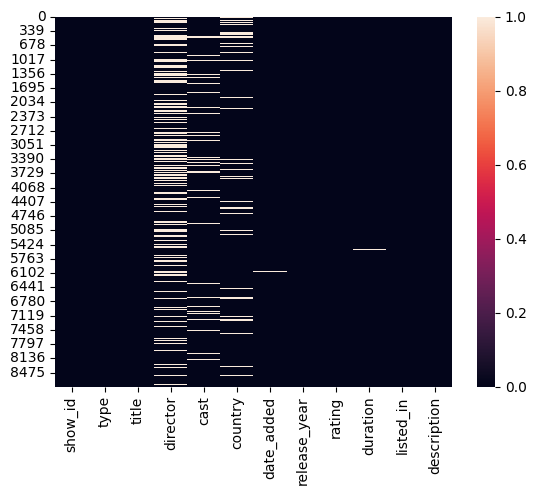

In [177]:
sns.heatmap(df.isnull())

In [178]:
df.dropna(inplace=True)

In [179]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


## To show titles

In [180]:
df['title']

7                             Sankofa
8       The Great British Baking Show
9                        The Starling
12                       Je Suis Karl
24                              Jeans
                    ...              
8801                          Zinzana
8802                           Zodiac
8804                       Zombieland
8805                             Zoom
8806                           Zubaan
Name: title, Length: 5332, dtype: object

In [181]:
df.shape[0]

5332

## To show all records of a particular item in any column

In [182]:
df[df['title'].isin(['Zubaan'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## To show all records of a particular string in any column

In [183]:
df[df['title'].str.contains('Zubaan')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## To find the year in which highest number of TV Shows & Movies released

In [184]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [185]:
df['date_N'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

In [186]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24


In [187]:
df['date_N'].dt.year.value_counts()

date_N
2019.0    1264
2020.0    1194
2018.0    1100
2021.0     755
2017.0     722
2016.0     202
2015.0      50
2014.0      14
2011.0      13
2013.0       7
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='date_N'>

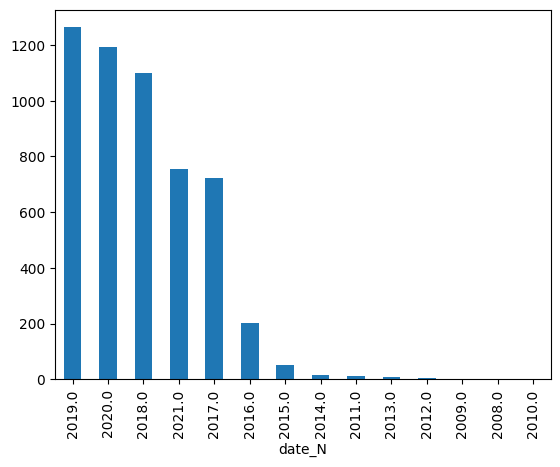

In [188]:
df['date_N'].dt.year.value_counts().plot(kind='bar')

- Most of the TV Shows and Movies were released in 2019

## To show how many Movies & TV Shows are in the dataset

In [189]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24


## grouping unique items

In [190]:
df.groupby('type').type.count()

type
Movie      5185
TV Show     147
Name: type, dtype: int64

<Axes: xlabel='type'>

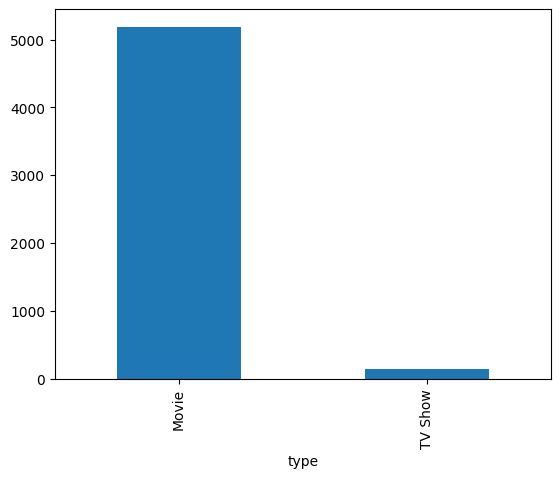

In [191]:
df.groupby('type').type.count().plot(kind='bar')

## To show all the Movies released in a particular year

In [192]:
df['year'] = df['date_N'].dt.year

In [193]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [194]:
df.dropna(subset=['release_year', 'year'], inplace=True)

In [195]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0


In [196]:
df[(df['type']=='TV Show')&(df['year']==2019)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
3096,s3097,TV Show,You,Lee Toland Krieger,"Penn Badgley, Elizabeth Lail, Shay Mitchell, J...",United States,"December 26, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas","Obsessed with an aspiring writer, a charming b...",2019-12-26,2019.0
3130,s3131,TV Show,"Crazy, Lovely, Cool",Obi Emelonye,"Enyinna Nwigwe, Adesua Etomi, Uru Eke, Zynnell...",Nigeria,"December 15, 2019",2018,TV-MA,1 Season,"International TV Shows, TV Dramas","For a group of charismatic undergraduates, the...",2019-12-15,2019.0
3137,s3138,TV Show,Girls und Panzer,Tsutomu Mizushima,"Mai Fuchigami, Ai Kayano, Mami Ozaki, Ikumi Na...",Japan,"December 15, 2019",2012,TV-PG,1 Season,"Anime Series, International TV Shows",Miho Nishizumi tries to escape her family's tr...,2019-12-15,2019.0
3174,s3175,TV Show,The Chosen One,Michel Tikhomiroff,"Paloma Bernardi, Renan Tenca, Gutto Szuster, P...",Brazil,"December 6, 2019",2019,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Determined to bring a Zika vaccine to the remo...,2019-12-06,2019.0
3356,s3357,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",Taiwan,"October 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Two nefarious schemes taking place 10 years ap...,2019-10-31,2019.0
3358,s3359,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",South Korea,"October 30, 2019",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A college student with psychic abilities takes...,2019-10-30,2019.0
3423,s3424,TV Show,Black Money Love,Ahmet Katıksız,"Güler Ökten, Hazal Türesan, İlkin Tüfekçi, Bed...",Turkey,"October 15, 2019",2014,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a cop's fiancée and a jewelry designer's...,2019-10-15,2019.0
3461,s3462,TV Show,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,"October 1, 2019",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","In this adaptation of a popular webtoon, a poo...",2019-10-01,2019.0
3477,s3478,TV Show,Gotham,Danny Cannon,"Ben McKenzie, Donal Logue, Jada Pinkett Smith,...",United States,"September 30, 2019",2019,TV-MA,5 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas","Long before he was commissioner, rookie cop Ja...",2019-09-30,2019.0
3503,s3504,TV Show,Criminal: Spain,Mariano Barroso,"Emma Suárez, Jorge Bosch, Álvaro Cervantes, Ca...",Spain,"September 20, 2019",2019,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",Psychological games abound between detectives ...,2019-09-20,2019.0


In [197]:
df[(df['type']=='TV Show')&(df['year']==2012)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year


## To show all TV Shows released in India

In [198]:
df[(df['type']=='TV Show')&(df['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",2021-08-06,2021.0
1293,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Manchu Lakshmi, Saanve Megghana, Naveen Kumar,...",India,"February 19, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From secrets and lies to jealousy and control,...",2021-02-19,2021.0
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,"December 18, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020-12-18,2020.0
3036,s3037,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,"January 10, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,2020-01-10,2020.0
4685,s4686,TV Show,GHOUL,Patrick Graham,"Radhika Apte, Manav Kaul, Ratnabali Bhattachar...",India,"August 24, 2018",2018,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",When a new prisoner at a military detention ce...,2018-08-24,2018.0
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019.0
8172,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising...",2018-03-31,2018.0


In [199]:
df[(df['type']=='TV Show')&(df['country']=='India')]['title']

297                                  Navarasa
1293                            Pitta Kathalu
1520                          Paava Kadhaigal
3036             Jamtara - Sabka Number Ayega
4685                                    GHOUL
6024                                7 (Seven)
8172    Th Eena Meena Deeka Chase Comedy Show
Name: title, dtype: object

## To show top 10 directors

In [200]:
df['director'].value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64

## Top 5 Actors on Netflix

In [201]:
# Extracting actors' information
actors = []
for cast in df['cast']:
    if isinstance(cast, str):
        actors.extend(cast.split(','))
        
# Counting the occurrences of each actor
actor_counts = Counter(actors)

# Finding the top 5 actors
top_actors = actor_counts.most_common(5)

# Printing the top 5 actors
for actor, count in top_actors:
    print(actor)

 Anupam Kher
 Om Puri
Shah Rukh Khan
 Boman Irani
 Paresh Rawal


## To show all records where type is Movies & listed in Comedies

In [202]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,2021.0
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,2021-09-01,2021.0
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...,2021-09-01,2021.0
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...,2021-08-01,2021.0
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",2021-08-01,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,s8326,Movie,"The Goods: Live Hard, Sell Hard",Neal Brennan,"Jeremy Piven, Ving Rhames, James Brolin, David...",United States,"November 20, 2019",2009,R,89 min,Comedies,Hired to rescue a flagging car dealership duri...,2019-11-20,2019.0
8420,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...,2019-06-04,2019.0
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...,2017-12-12,2017.0
8608,s8609,Movie,Total Frat Movie,Warren P. Sonoda,"Justin Deeley, Alex House, Steven Yaffee, Rebe...",United States,"December 19, 2016",2016,NR,94 min,Comedies,A disbanded fraternity tries to get their act ...,2016-12-19,2016.0


## To show all records where type is Movies & listed in Comedies & country is India

In [203]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')| (df['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,2021.0
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021-09-05,2021.0
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2021-09-02,2021.0
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021-09-02,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017-05-01,2017.0
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018-01-01,2018.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019-12-31,2019.0
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018-02-15,2018.0


## To find how many Movies & TV Show, Raul Campos, Jan Suter direct.

In [204]:
df[df['director']=='Raúl Campos, Jan Suter']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
4749,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",2018-07-27,2018.0
4781,s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,2018-07-06,2018.0
4808,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,2018-06-29,2018.0
4849,s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,2018-05-25,2018.0
4866,s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,2018-05-11,2018.0
4940,s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Lucas Lauriente,Argentina,"April 6, 2018",2018,TV-MA,78 min,Stand-Up Comedy,"In his stand-up set, Argentine comic Lucas Lau...",2018-04-06,2018.0
4962,s4963,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...,2018-03-30,2018.0
5001,s5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...,2018-03-02,2018.0
5002,s5003,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...,2018-03-02,2018.0
5062,s5063,Movie,Sebastián Marcelo Wainraich,"Raúl Campos, Jan Suter",Sebastián Marcelo Wainraich,Argentina,"January 26, 2018",2018,TV-MA,49 min,Stand-Up Comedy,Argentine comedian Sebastián Wainraich highlig...,2018-01-26,2018.0


## To show in how many movies/ TV Shows Tom Cruise were cast

In [205]:
df[df['cast']== 'Tom Cruise']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year


In [206]:
data_new = df.dropna()      

In [207]:
data_new.head(2) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0


In [208]:
data_new[data_new['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01,2021.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01,2021.0


In [209]:
data_new[data_new['director'].str.contains('Raúl Campos')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
4749,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",2018-07-27,2018.0
4781,s4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,2018-07-06,2018.0
4808,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,2018-06-29,2018.0
4849,s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,2018-05-25,2018.0
4866,s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,2018-05-11,2018.0
4940,s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Lucas Lauriente,Argentina,"April 6, 2018",2018,TV-MA,78 min,Stand-Up Comedy,"In his stand-up set, Argentine comic Lucas Lau...",2018-04-06,2018.0
4962,s4963,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...,2018-03-30,2018.0
5001,s5002,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...,2018-03-02,2018.0
5002,s5003,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...,2018-03-02,2018.0
5062,s5063,Movie,Sebastián Marcelo Wainraich,"Raúl Campos, Jan Suter",Sebastián Marcelo Wainraich,Argentina,"January 26, 2018",2018,TV-MA,49 min,Stand-Up Comedy,Argentine comedian Sebastián Wainraich highlig...,2018-01-26,2018.0


## To show  Most watched Movies

In [210]:
most_watched_movies = df[df['type'] == 'Movie']['title'].value_counts().idxmax()
print(most_watched_movies)

Sankofa


## To show which country released maximum movies

In [211]:
max_movies_country = df[df['type'] == 'Movie']['country'].value_counts().idxmax()
print("The country with the maximum number of movies released is:", max_movies_country)

The country with the maximum number of movies released is: United States


## To show most watched TV Show

In [212]:
most_watched_tv_show = df[df['type'] == 'TV Show']['title'].value_counts().idxmax()
print("The most watched TV show is:", most_watched_tv_show)

The most watched TV show is: The Great British Baking Show


## To show different types of rating by Netflix

In [213]:
df['rating'].nunique()

14

In [214]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

## To show the Movies whose rating is TV-14

In [215]:
df[(df['type']=='Movie')&(df['rating']=='TV-14')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021.0
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",2021-09-15,2021.0
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,2021-09-15,2021.0
56,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,"September 15, 2021",2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...,2021-09-15,2021.0
60,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ...",2021-09-15,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017-05-01,2017.0
8774,s8775,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States","October 22, 2019",2018,TV-14,97 min,"Dramas, Independent Movies, International Movies",A man cured of leprosy and a young orphan leav...,2019-10-22,2019.0
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,2018-10-11,2018.0
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018-02-15,2018.0


## To show the most rated movies

In [216]:
most_rated_movie = df['title'].value_counts().index[0]
print("The most rated movie is:", most_rated_movie)

The most rated movie is: Sankofa


In [217]:
df[(df['type']=='Movie')&(df['rating']=='TV-14')].shape

(1177, 14)

## To show how many movies got TV-14 rating India

In [218]:
df[(df['type']=='Movie')&(df['rating']=='TV-14')&(df['country']=='India')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021.0
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021-09-05,2021.0
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2021-09-02,2021.0
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2021-09-02,2021.0
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...,2021-09-02,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,2018-03-01,2018.0
8771,s8772,Movie,Yaara O Dildaara,Ksshitij Chaudhary,"Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulza...",India,"November 1, 2017",2011,TV-14,132 min,"Dramas, International Movies, Music & Musicals",The patriarch of a wealthy family with one ind...,2017-11-01,2017.0
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",2017-05-01,2017.0
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018-02-15,2018.0


In [219]:
df[(df['type']=='Movie')&(df['rating']=='TV-14')&(df['country']=='India')].shape

(515, 14)

## To show how many TV Show got R-rating after 2019

In [220]:
df[(df['type']=='TV Show')&(df['rating']=='R')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year


In [221]:
df[(df['type']=='TV Show')&(df['rating']=='R')&(df['year']==2019)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year


## To find maximum duration of a Movies/TV Shows

In [222]:
df.duration.unique()

array(['125 min', '9 Seasons', '104 min', '127 min', '166 min', '103 min',
       '97 min', '106 min', '96 min', '124 min', '116 min', '98 min',
       '91 min', '115 min', '122 min', '99 min', '88 min', '100 min',
       '102 min', '93 min', '95 min', '85 min', '83 min', '182 min',
       '147 min', '90 min', '128 min', '143 min', '119 min', '114 min',
       '118 min', '108 min', '117 min', '121 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '94 min', '109 min', '101 min',
       '105 min', '86 min', '229 min', '76 min', '89 min', '110 min',
       '156 min', '112 min', '129 min', '107 min', '1 Season', '135 min',
       '136 min', '165 min', '150 min', '133 min', '145 min', '92 min',
       '2 Seasons', '64 min', '59 min', '111 min', '87 min', '148 min',
       '189 min', '141 min', '130 min', '7 Seasons', '68 min', '131 min',
       '126 min', '155 min', '123 min', '84 min', '4 Seasons', '13 min',
       '77 min', '74 min', '49 min', '72 min', '78 min', '70 min'

In [223]:
df.duration.dtypes

dtype('O')

In [224]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0


In [225]:
df[['Minutes','Unit']] = df['duration'].str.split(' ',expand=True)

In [226]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0,125,min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0,9,Seasons


In [227]:
# df['Minutes'].max()
# Convert 'Minutes' column to numeric, coercing errors to NaN
df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
max_minutes = df['Minutes'].max()
print(max_minutes)

253


In [228]:
df['Minutes'].min()

1

In [229]:
df['Minutes'].mean()

99.99418168168168

- Maximum duration of Movies is : 253

## Highest no. of TV Shows in a particular country

In [230]:
data_tvshow = df[df['type']=='TV Show']

In [231]:
data_tvshow.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0,9,Seasons
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,2021-08-27,2021.0,1,Season


In [232]:
data_tvshow.country.value_counts()

country
United States                                                    25
United Kingdom                                                   18
Japan                                                            10
South Korea                                                       9
Spain                                                             7
India                                                             7
Taiwan                                                            7
France                                                            5
Turkey                                                            5
Thailand                                                          5
Nigeria                                                           4
Brazil                                                            4
Canada                                                            3
United States, Canada                                             2
Denmark                                 

- United State has the highest no. of TV Shows

## Sorting dataset by year

In [233]:
df.sort_values(by='year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min
5951,s5952,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,"October 1, 2011",1990,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011-10-01,2011.0,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,s1022,Movie,Peepli Live,"Anusha Rizvi, Mahmood Farooqui","Omkar Das Manikpuri, Raghuvir Yadav, Malaika S...",India,"April 17, 2021",2010,TV-MA,109 min,"Comedies, Dramas, Independent Movies",Two indigent farmers consider suicide so that ...,2021-04-17,2021.0,109,min
1020,s1021,Movie,Madness in the Desert,Satyajit Bhatkal,"Aamir Khan, Ashutosh Gowariker",India,"April 17, 2021",2004,TV-14,141 min,"Documentaries, International Movies","The story of making ""Lagaan,"" one of the mille...",2021-04-17,2021.0,141,min
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom","April 17, 2021",2001,PG,224 min,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",2021-04-17,2021.0,224,min
1031,s1032,Movie,Into the Beat,Stefan Westerwelle,"Alexandra Pfeifer, Yalany Marschner, Trystan P...",Germany,"April 16, 2021",2020,TV-14,102 min,"Dramas, International Movies, Romantic Movies",A teen ballerina discovers hip-hop by chance a...,2021-04-16,2021.0,102,min


In [234]:
df.sort_values(by='year').head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min


In [244]:
df.sort_values(by='year',ascending=True).head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit,description_C
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min,model novel reveal david 20 alive disappearan...
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min,model novel reveal david 20 alive disappearan...
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min,model novel reveal david 20 alive disappearan...
7370,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min,model novel reveal david 20 alive disappearan...
5951,s5952,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,"October 1, 2011",1990,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011-10-01,2011.0,95,min,many model novel reveal david 20 alive disappe...
5942,s5943,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",1988,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0,95,min,model novel reveal david 20 alive disappearan...
5943,s5944,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,"October 1, 2011",1986,TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",2011-10-01,2011.0,96,min,model novel reveal david 20 alive disappearan...
5944,s5945,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,"October 1, 2011",1986,TV-14,94 min,Dramas,This drama based on real-life events tells the...,2011-10-01,2011.0,94,min,model novel reveal david 20 alive disappearan...
5945,s5946,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",1990,TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...,2011-10-01,2011.0,94,min,model novel reveal david 20 alive disappearan...
5946,s5947,Movie,Quiet Victory: The Charlie Wedemeyer Story,Roy Campanella II,"Pam Dawber, Michael Nouri, Bess Meyer, Peter B...",United States,"October 1, 2011",1988,TV-PG,93 min,"Dramas, Sports Movies",When high school football coach Charlie Wedeme...,2011-10-01,2011.0,93,min,model novel reveal david 20 alive disappearan...


## To show type is  'Movie' & listed in 'Dramas'

In [237]:
df[(df['type']=='Movie')&(df['listed_in']=='Dramas')].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,2021-09-01,2021.0,108,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,2021-09-01,2021.0,124,min


## To show type is  'TV Show' & listed in "Kids' TV"

In [238]:
df[(df['type']=='TV Show')&(df['listed_in']=="Kids' TV")].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
1463,s1464,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States","January 1, 2021",2014,TV-Y,1 Season,Kids' TV,"The Cat in the Hat is back – and this time, he...",2021-01-01,2021.0,1,Season
2307,s2308,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020-07-01,2020.0,1,Season


In [239]:
df[(df['type']=='Movie')&(df['listed_in']=='Dramas')|(df['type']=='TV Show')&(df['listed_in']=="Kids' TV")]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,2021-09-01,2021.0,108,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,2021-09-01,2021.0,124,min
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl...",2021-09-01,2021.0,118,min
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,2021-08-01,2021.0,142,min
343,s344,Movie,My Girl,Howard Zieff,"Dan Aykroyd, Jamie Lee Curtis, Macaulay Culkin...",United States,"August 1, 2021",1991,PG-13,102 min,Dramas,This coming-of-age charmer follows a summer in...,2021-08-01,2021.0,102,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,2017-12-12,2017.0,106,min
8675,s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017-07-24,2017.0,110,min
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19,2019.0,99,min
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,2019.0,109,min


## To show common words in descriptions

In [240]:
from collections import Counter
import re

def find_common_words(df):
    common_words = []
    ratings = df['rating'].unique()
    
    for rating in ratings:
        filtered_df = df[df['rating'] == rating]
        descriptions = ' '.join(filtered_df['description'])
        words = re.findall(r'\w+', descriptions.lower())
        common_words.extend(words)
    
    word_counts = Counter(common_words)
    common_words = [word for word, count in word_counts.items() if count == len(ratings)]
    
    return common_words

common_words = find_common_words(df)
print(common_words)


['model', 'novel', 'reveal', 'david', '20', 'alive', 'disappearance', 'many', 'estate', 'harrowing', 'sees', 'thieves', 'greedy', 'jungle', 'passionate', 'call', 'hospital', 'low', 'empire', 'drugs', 'foster', 'shop', 'aliens', 'fiancé', 'deceased', 'catch', 'station', 'engaged', 'complex', 'spirits', 'reflects', 'reluctantly', 'questions', 'throws', 'performs', 'english', 'mouse', 'millionaire', 'door', 'forest', 'halloween', 'eager', 'adult', 'extreme', 'hell', 'university', 'rob', 'vows', 'risk', 'san', 'idealistic', 'authorities', 'rare', 'wishes', 'office', 'funny', 'turning', 'few', 'birth', 'attention', 'tom', 'rookie', 'app', 'needs', 'soul', 'post', 'whether', 'raising', 'korean', 'scientists', 'adaptation', 'retirement', 'imprisoned', 'standing', 'recruited', 'adventures', 'lovers', 'witch', 'odds', 'existence', 'sea']


In [241]:
df['description_C'] = df['description'].apply(lambda x: ' '.join([word for word in x.lower().split() if word in common_words]))


In [242]:
df['description_C'] = df['description_C'] + ' ' + ' '.join(common_words)


In [245]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_N,year,Minutes,Unit,description_C
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021.0,125,min,model model novel reveal david 20 alive disapp...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021.0,9,Seasons,model novel reveal david 20 alive disappearan...


## Conclusion for Netflix Dataset Analysis

from the above analysis of the data we find that-
- Top 5 Directors are: 
    - Raúl Campos, Jan Suter   
    - Marcus Raboy              
    - Jay Karas            
    - Cathy Garcia-Molina
    - Martin Scorsese 
- top 5 Actors on Netflix :
    - Anupam Kher
    - Om Puri
    - Shah Rukh Khan
    - Boman Irani
    - Paresh Rawal
- The most watched Movies is: Sankofa
- The most watched TV show is: The Great British Baking Show
- The most rated movies is: Dick Johnson Is Dead
- Most of the movies in 2019
- The country with the maximum number of movies released is: United States
